In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#? load_breast_cancer
#data = load_breast_cancer()
#data1 = pd.DataFrame(data.data, columns=data.feature_names)
#data1['Target'] = pd.Series(data.target)
#data1.info()
#print(data1['Target'].value_counts())

data1=pd.read_csv('C:/Users/a121014/Downloads/titanic.csv')
data1['Pclass'] = data1['Pclass'].astype('object')
#print(data1.info())

data2=data1.drop('Name', axis=1)

data3 = pd.get_dummies(data2)
print(data3.info())
#data2.head()


#data1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 10 columns):
Survived                   887 non-null int64
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
Pclass_1                   887 non-null uint8
Pclass_2                   887 non-null uint8
Pclass_3                   887 non-null uint8
Sex_female                 887 non-null uint8
Sex_male                   887 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.1 KB
None


In [3]:
#split up test/train

y = data3[['Survived']]
x = data3.drop(['Survived'], axis=1)

#x.info()
#y.info()

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=7)

In [4]:
#test using default settings

random_forest = RandomForestClassifier(random_state=42)
print(random_forest.fit(x_train, y_train.values.ravel()))

score_train = random_forest.score(x_train, y_train.values.ravel())
score_valid = random_forest.score(x_valid, y_valid.values.ravel())

print("Accuracy Score_train: %.2f%%" % (score_train))
print("Accuracy Score_valid: %.2f%%" % (score_valid))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Accuracy Score_train: 0.97%
Accuracy Score_valid: 0.80%


In [5]:
#Create the grid for grid search

n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

#search the grid
grid = GridSearchCV(estimator=random_forest, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(x_train, y_train.values.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   24.1s finished


In [6]:
# summarize results of grid search

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#print the best estimator parameters and score

print(grid_result.best_estimator_)
print(grid_result.best_params_)
print(grid_result.best_score_)

Best: 0.827927 using {'max_depth': 10, 'n_estimators': 100}
0.796897 (0.008738) with: {'max_depth': None, 'n_estimators': 10}
0.806770 (0.014290) with: {'max_depth': None, 'n_estimators': 100}
0.816643 (0.009799) with: {'max_depth': None, 'n_estimators': 1000}
0.815233 (0.010985) with: {'max_depth': None, 'n_estimators': 2000}
0.808181 (0.010911) with: {'max_depth': 5, 'n_estimators': 10}
0.816643 (0.008989) with: {'max_depth': 5, 'n_estimators': 100}
0.823695 (0.010822) with: {'max_depth': 5, 'n_estimators': 1000}
0.825106 (0.011330) with: {'max_depth': 5, 'n_estimators': 2000}
0.803949 (0.006927) with: {'max_depth': 10, 'n_estimators': 10}
0.827927 (0.005227) with: {'max_depth': 10, 'n_estimators': 100}
0.823695 (0.010990) with: {'max_depth': 10, 'n_estimators': 1000}
0.823695 (0.007812) with: {'max_depth': 10, 'n_estimators': 2000}
0.796897 (0.008738) with: {'max_depth': 20, 'n_estimators': 10}
0.808181 (0.013923) with: {'max_depth': 20, 'n_estimators': 100}
0.816643 (0.009799) with

In [7]:
#score full dataset with optimal parameters and oob validation

rf_final = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

rf_final.fit(x, y.values.ravel())
print("%.4f" % rf_final.oob_score_)

0.8253


Age = 0.23410091764251015
Siblings/Spouses Aboard = 0.04747537253660458
Parents/Children Aboard = 0.03161423007992536
Fare = 0.219813587748413
Pclass_1 = 0.03702532866788725
Pclass_2 = 0.01808708785201821
Pclass_3 = 0.06824483564902586
Sex_female = 0.1947483623948147
Sex_male = 0.14889027742880087


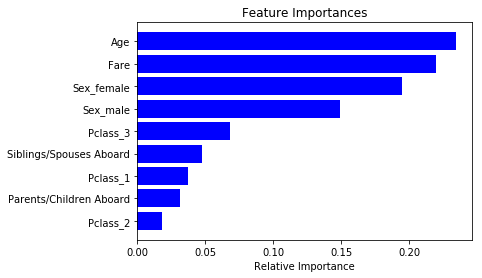

In [8]:
#print Variable importance

for name, importance in zip(x.columns, rf_final.feature_importances_):
        print(name, '=', importance)
        
features = x.columns
importances = rf_final.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AUC_Train: 0.983
AUC_Valid: 0.986


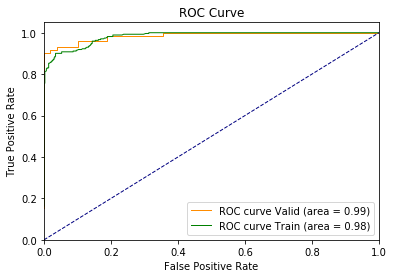

In [9]:
#print ROC

from sklearn.metrics import roc_auc_score, roc_curve, auc

probs_train = rf_final.predict_proba(x_train)
probs_valid = rf_final.predict_proba(x_valid)

probs_train = probs_train[:,1]
probs_valid = probs_valid[:,1]

auc_valid=roc_auc_score(y_valid, probs_valid)
auc_train=roc_auc_score(y_train, probs_train)
print('AUC_Train: %.3f' % auc_train)
print('AUC_Valid: %.3f' % auc_valid)


fpr1, tpr1, thresholds1 = roc_curve(y_valid, probs_valid)
fpr2, tpr2, thresholds2 = roc_curve(y_train, probs_train)

plt.figure()
lw=1
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw, label='ROC curve Valid (area = %0.2f)' % auc_valid)
plt.plot(fpr2, tpr2, color='green',
         lw=lw, label='ROC curve Train (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")